# VIMS Spectral Kymographs
This notebook shows the tools used to create a spectral kymograph for single VIMS cubes and over a flyby projected on the sky.

In [5]:
from scripts.project_defs import *

# get the absolute path to the repository root
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# construct root path to data cubes
root_path = os.path.join(repo_root, "data", "cubes")

In [6]:
# choose flyby
flyby = "E17"
# flyby = "E19"
# flyby = "E13"

if flyby == "E17":
    CUBE_IDS = [
        '1711536135_1', '1711536423_1', '1711536777_1', '1711537065_1', '1711537413_1',
        '1711537701_1', '1711538046_1', '1711538334_1', '1711538684_1', '1711538972_1',
        '1711539317_1', '1711539605_1', '1711539953_1', '1711540241_1', '1711540588_1',
        '1711540876_1', '1711541224_1', '1711541512_1', '1711541857_1', '1711542145_1',
        '1711542490_1', '1711542778_1', '1711543130_1', '1711543418_1', '1711543762_1',
        '1711544050_1', '1711544399_1', '1711544687_1', '1711545033_1', '1711545321_1',
        '1711545666_1', '1711545954_1', '1711546301_1', '1711546589_1', '1711546939_1',
        '1711547227_1', '1711547571_1', '1711547859_1', '1711548206_1', '1711548494_1',
        '1711548846_1', '1711549134_1', '1711549477_1', '1711549765_1', '1711550111_1',
        '1711550399_1', '1711550750_1', '1711551038_1', '1711551375_1', '1711551663_1',
        '1711552021_1', '1711552309_1', '1711552654_1', '1711552942_1', '1711553290_1',
        '1711553578_1',
        # "1711553950_1",
        # "1711554022_1"
    ]
    # rotation angle based on the inclination of stripes wrt to cube horizontal (sample direction)
    rota = 35.8 # deg

elif flyby == "E19":
    CUBE_IDS = [
    # '1714609767_1', '1714609943_1', '1714610119_1', '1714610267_1',
    # '1714610443_1', '1714610619_1', '1714610795_1', '1714610971_1',
    # '1714611147_1', '1714611323_1', '1714629434_1',
    '1714629711_1', '1714630011_1', '1714630311_1', '1714630699_1',
    '1714630999_1', '1714631299_1', '1714631677_3', '1714631977_1',
    '1714632277_1', '1714632697_1'
]
    rota = 42.2

elif flyby == "E13":
    CUBE_IDS = [
    "1671579308_1", "1671580116_1", "1671580920_1",
    "1671581723_1", "1671582524_1", "1671583330_1"
]
    rota = 40.2
else:
    CUBE_IDS = []
    rota = 0

CUBES = [VIMS(cube_id, root=root_path) for cube_id in CUBE_IDS]

# Kymograph for a single cube
Adjust cubes so that the stripes in the image align vertically (wrt the VIMS sampling direction)

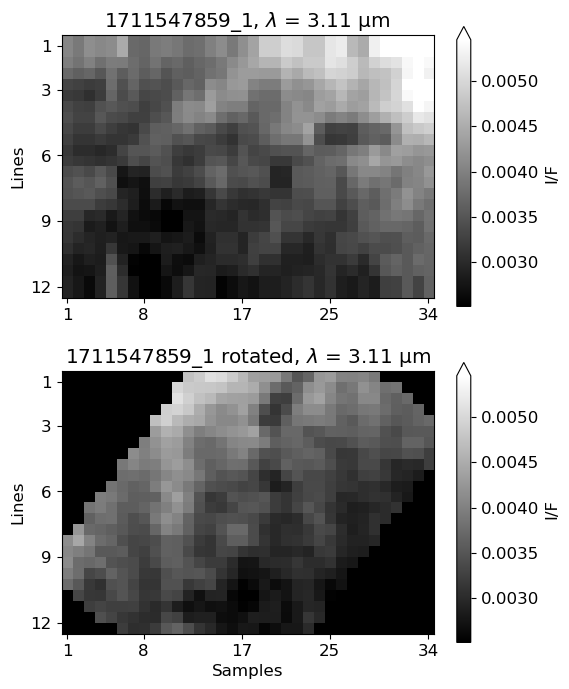

In [27]:
example_cube = CUBES[-19]
data = np.array(example_cube.data)
# choose central wavelength channel and how many wavelength channels to combine into a single image
i = 134
combine_channels = 0

# Define the rotation angle (e.g., 45 degrees if the stripes are diagonal) from x-axis window
rotation_angle = 90-rota

# Define the aspect ratio correction factor (height scaling factor)
aspect_ratio_correction = 2 # VIMS_IR pixel sample size is half line size

if combine_channels:
    cup = data[i - combine_channels:i + combine_channels+1, :, :]
    cup = np.average(cup, axis=0)
else:
    cup = data[i, :, :]

# Adjust the aspect ratio of the image
adjusted_image = adjust_aspect_ratio(cup, aspect_ratio_correction)
# Rotate the image to align the stripes vertically and get the mask
aligned_image, mask = align_stripes_with_mask(adjusted_image, rotation_angle)
# calculate colorbar range
vmin, vmax = calculate_percentiles(cup)

# Create a figure of the normal cube image and rotated image
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
plt.rcParams.update({'font.size': 12})

ax[0].imshow(adjusted_image, extent=example_cube.extent, cmap='gray', vmin=vmin, vmax=vmax, aspect=aspect_ratio_correction)
ax[0].set_ylabel(example_cube.llabel)
ax[0].set_title(f'{example_cube}, $\lambda$ = {example_cube.wvlns[i]:.2f} μm')
ax[0].set_xticks(example_cube.sticks)
ax[0].set_yticks(example_cube.lticks)
plt.colorbar(ax[0].images[0], ax=ax[0], extend='max', label='I/F')

ax[1].imshow(aligned_image, extent=example_cube.extent, cmap='gray', vmin=vmin, vmax=vmax, aspect=aspect_ratio_correction)
ax[1].set_xlabel(example_cube.slabel)
ax[1].set_ylabel(example_cube.llabel)
ax[1].set_title(f'{example_cube} rotated, $\lambda$ = {example_cube.wvlns[i]:.2f} μm')
ax[1].set_xticks(example_cube.sticks)
ax[1].set_yticks(example_cube.lticks)
plt.colorbar(ax[1].images[0], ax=ax[1], extend='max', label='I/F')
plt.show()


Plot the kymograph

Cube name: 1711547859_1


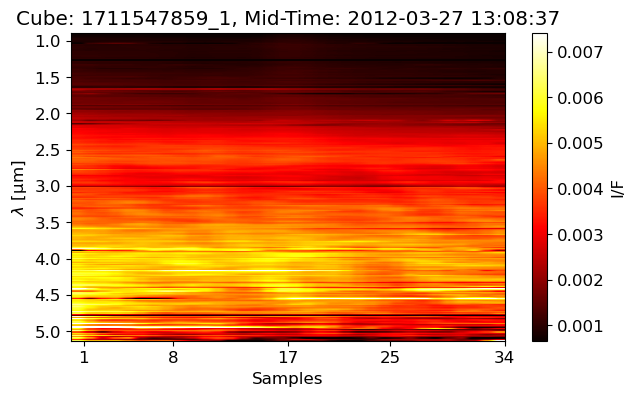

C:\Users\Eigenaar\AppData\Local\Temp\ipykernel_1796\1487388407.py:59: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x,y, kymograph, cmap='hot',


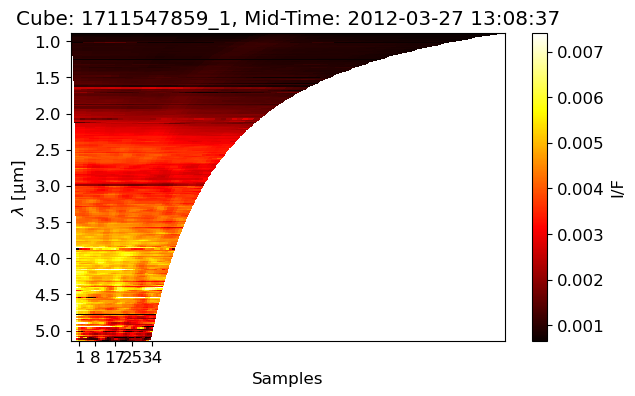

In [30]:
cube = example_cube
print(f'Cube name: {cube}')

#   ------------------------------------ rotated ---------------------------------------
# Initialize a list to store the averaged intensity profiles
intensity_profiles = []
ii = np.arange(combine_channels, 256 - combine_channels, 1)  #

for i in ii:
    if combine_channels:
        cup = data[i - combine_channels:i + combine_channels+1, :, :]
        cup_avg = np.average(cup, axis=0)
        cup = cup_avg
    else:
        cup = data[i, :, :]

    # Adjust the aspect ratio of the image
    adjusted_image = adjust_aspect_ratio(cup, aspect_ratio_correction)
    # Rotate the image to align the stripes and get the mask
    aligned_image, mask = align_stripes_with_mask(adjusted_image, rotation_angle)

    # Compute the average intensity profile across the rows, using the mask to exclude zero regions
    masked_sum = np.sum(aligned_image * mask, axis=0)
    valid_counts = np.sum(mask, axis=0)
    avg_profile = np.divide(masked_sum, valid_counts, where=valid_counts != 0)  # Avoid division by zero

    # Store the averaged profile
    intensity_profiles.append(avg_profile)

# Stack the profiles to create a 2D kymograph
kymograph = np.vstack(intensity_profiles)

# plot kymograph
vmin, vmax = calculate_percentiles(kymograph, lower=2, upper=99.5)
plt.figure(figsize=(7, 4))
plt.rcParams.update({'font.size': 12})
plt.imshow(kymograph, cmap='hot', aspect='auto',
           extent=[0, kymograph.shape[1], cube.wvlns[-1], cube.wvlns[0]],
           vmin=vmin,vmax=vmax)
plt.colorbar(label='I/F')
plt.xlabel('Samples')
plt.ylabel(f'$\lambda$ [μm]')
plt.xticks(cube.sticks)
# Add title and other annotations
time_utc_i = cube.time
time_utc_i = datetime.fromisoformat(str(time_utc_i)).strftime("%Y-%m-%d %H:%M:%S")
plt.title(f'Cube: {cube}, Mid-Time: {time_utc_i}')
plt.show()

# VERIFICATION
# transform kymograph so straight lines would appear vertically
# meshgrid
y_values = cube.wvlns #[::-1]
x_values = np.arange(0, kymograph.shape[1], 1)
x, y = np.meshgrid(x_values, y_values)
# matrix transformation to check if kymograph stripes are indeed straight
x = y_values[-1]*x/y
plt.figure(figsize=(7, 4))
plt.pcolormesh(x,y, kymograph, cmap='hot',
           vmin=vmin,vmax=vmax)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.colorbar(label='I/F')
plt.xlabel('Samples')
plt.ylabel(f'$\lambda$ [μm]')
plt.xticks(cube.sticks)
# Add title and other annotations
time_utc_i = cube.time
time_utc_i = datetime.fromisoformat(str(time_utc_i)).strftime("%Y-%m-%d %H:%M:%S")
plt.title(f'Cube: {cube}, Mid-Time: {time_utc_i}')
plt.show()

# Kymograph for VIMS flyby projections

In [31]:
# compute the center of each cube projected on the sky
centroids = np.array([[np.mean(cube.sky[0]), np.mean(cube.sky[1])]for cube in CUBES])
# compute distances between centers
distances = np.sqrt(np.sum(np.diff(centroids, axis=0)**2, axis=1))

data = np.array([
    cube.data
    for cube in CUBES
])

paths = [
    Path(cube.rsky[:, l, s, :].T)
    for cube in CUBES
    for l in range(cube.NL)
    for s in range(cube.NS)
]

vertices = np.stack([
    path.vertices
    for path in paths
])

ra_min, dec_min = vertices.min(axis=(0, 1))
ra_max, dec_max = vertices.max(axis=(0, 1))

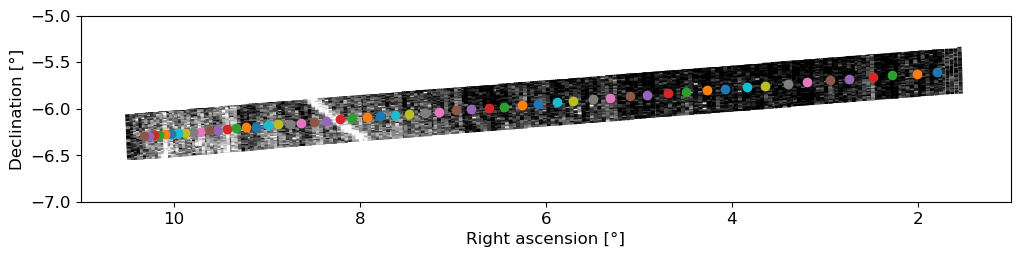

In [32]:
# i = 0    # 0.89 μm
i = 134  # 3.11 μm
i = 254  # 5.11 μm

norm = Normalize(vmin=0, vmax=np.percentile(data[:, i, :, :], 99), clip=True)
colors = plt.get_cmap('gray')(norm(data[:, i, :, :].flatten()))

_, ax = plt.subplots(figsize=(12, 4))
ax.add_collection(PathCollection(paths, facecolors=colors, edgecolors=colors))
for center in centroids:
    plt.scatter(center[0], center[1])
# Set the plot limits and labels
ax.set_xlim(np.ceil(ra_max + .25), np.floor(ra_min - .25))
ax.set_ylim(np.floor(dec_min - .25), np.ceil(dec_max + .25))

ax.set_xlabel('Right ascension [\u00B0]')
ax.set_ylabel('Declination [\u00B0]')
ax.set_aspect('equal')
plt.rcParams.update({'font.size': 16})  # Change '12' to your desired font size
plt.show();

Rotate and vertically average all cubes over every wavelength to create a list of kymographs.

In [34]:
images = []
background = []

for cube in CUBES:
    # print(f'Cube name: {cube}')
    data = np.array(cube.data)
    bg_avg = np.mean(data, axis=(1, 2))
    background.append(bg_avg)
    combine_channels = 0
    #   ------------------------------------ rotated ---------------------------------------
    # Initialize a list to store the averaged intensity profiles
    intensity_profiles = []
    ii = np.arange(combine_channels, 256 - combine_channels, 1)  #

    # Define the aspect ratio correction factor (height scaling factor)
    aspect_ratio_correction = aspect_ratio_correction
    for i in ii:
        if combine_channels:
            cup = data[i - combine_channels:i + combine_channels+1, :, :]
            cup_avg = np.average(cup, axis=0)
            cup = cup_avg
        else:
            cup = data[i, :, :]

        # Adjust the aspect ratio of the image
        adjusted_image = adjust_aspect_ratio(cup, aspect_ratio_correction)
        # Rotate the image to align the stripes and get the mask
        aligned_image, mask = align_stripes_with_mask(adjusted_image, rotation_angle)
        # Compute the average intensity profile across the rows, using the mask to exclude zero regions
        masked_sum = np.sum(aligned_image * mask, axis=0)
        valid_counts = np.sum(mask, axis=0)
        avg_profile = np.divide(masked_sum, valid_counts, where=valid_counts != 0)  # Avoid division by zero
        # Store the averaged profile
        intensity_profiles.append(avg_profile)

    # Stack the profiles to create a 2D kymograph
    kymograph = np.vstack(intensity_profiles)
    images.append(kymograph)

# compute average spectrum of the entire flyby
bg_averages = np.mean(background, axis=0)

Plot flyby kymograph.

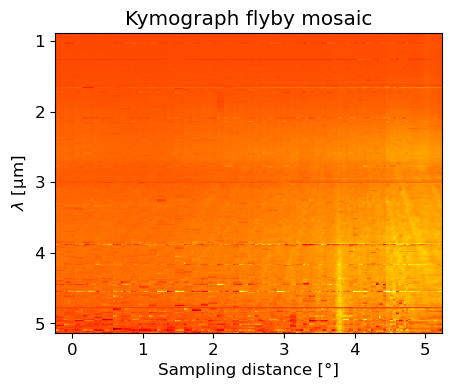

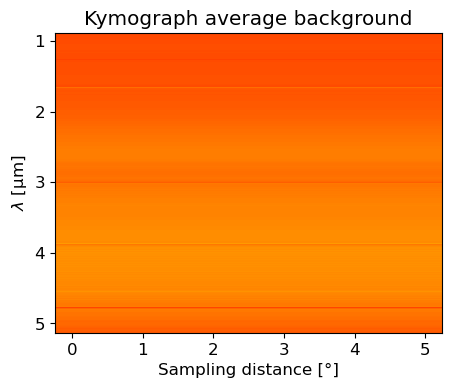

In [36]:
npixels = np.shape(images[0])[1] # number of pixels along sample
w = np.rad2deg(0.5*10**-3) * npixels/2        # pixel effective ifov times number of pixels
h = np.rad2deg(0.5*10**-3) * npixels
heights = np.ones((len(images),1)) *h
widths = np.ones((len(images),1))*w

# Compute cumulative x-offsets
x_offsets = np.concatenate(([0], np.cumsum(distances)))

for i in range(len(x_offsets)):
    x_offsets[i] = x_offsets[i] *np.cos(np.deg2rad(rotation_angle))

h0, h1 = CUBES[0].wvlns[-1], CUBES[0].wvlns[0]

# Find global min and max across all images
global_min = np.min([np.min(img) for img in images])
global_max = np.max([np.max(img) for img in images])

normalized_bg = (bg_averages[:, np.newaxis]  - global_min) / (global_max - global_min)

fig, ax = plt.subplots(figsize=(5,6))
plt.rcParams.update({'font.size': 12})

# Plot each image at its corresponding x position with specified width and height
for i, (img, width) in enumerate(zip(images, widths)):
    extent = [x_offsets[i] - width / 2,  # Left boundary
              x_offsets[i] + width / 2,  # Right boundary
              h0,               # Bottom boundary
              h1]                # Top boundary

    # Normalize the image based on global min and max
    normalized_img = (img - global_min) / (global_max - global_min)
    ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot', vmin=0, vmax=0.9)

# Set limits and aspect ratio
ax.set_xlim(x_offsets[0] - widths[0] / 2, x_offsets[-1] + widths[-1] / 2)
ax.set_title("Kymograph flyby mosaic")
ax.set_xlabel("Sampling distance [\u00B0]")
ax.set_ylabel(r'$\lambda$ [μm]')
ax.set_aspect(aspect=.25)
ax.set_aspect('equal')
fig.canvas.toolbar_visible = True
fig.canvas.header_visible = True
fig.canvas.footer_visible = True
# plt.grid()
plt.show()

# plot average background
fig, ax = plt.subplots(figsize=(5,6))
# Plot each image at its corresponding x position with specified width and height
for i, (img, width) in enumerate(zip(images, widths)):
    extent = [x_offsets[i] - width / 2,  # Left boundary
              x_offsets[i] + width / 2,  # Right boundary
              h0,               # Bottom boundary
              h1]                # Top boundary

    normalized_img = (img - global_min) / (global_max - global_min)

    # normalized_img = img
    ax.imshow(normalized_bg, extent=extent, origin='upper', cmap='hot', vmin=0, vmax=0.9)

# Set limits and aspect ratio
ax.set_xlim(x_offsets[0] - widths[0] / 2, x_offsets[-1] + widths[-1] / 2)
ax.set_title("Kymograph average background")
ax.set_xlabel("Sampling distance [\u00B0]")
ax.set_ylabel(r'$\lambda$ [μm]')
ax.set_aspect('equal')
fig.canvas.toolbar_visible = True
fig.canvas.header_visible = True
fig.canvas.footer_visible = True
# plt.grid()
# Show plot
plt.show()


Verify if kymograph stripes are indeed straight

C:\Users\Eigenaar\AppData\Local\Temp\ipykernel_1796\2988384933.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x,y, normalized_img, cmap='hot',


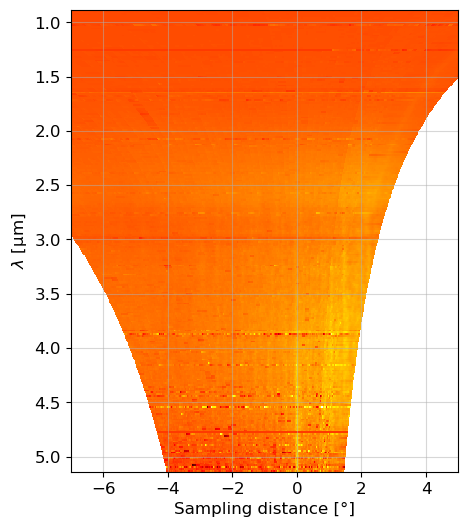

In [37]:
# Define the x-shift
x_shift = -3.78
fig, ax = plt.subplots(figsize=(5,6))

# Compute cumulative x-offsets and apply rotation and shift
x_offsets = np.concatenate(([0], np.cumsum(distances)))
for i in range(len(x_offsets)):
    x_offsets[i] = x_offsets[i] * np.cos(np.deg2rad(rotation_angle))

# Apply the shift
x_offsets = x_offsets + x_shift

# Plot each image at its corresponding x position with specified width and height
for i, (img, width) in enumerate(zip(images, widths)):
    extent = [x_offsets[i] - width / 2,  # Left boundary
              x_offsets[i] + width / 2,  # Right boundary
              h0,                        # Bottom boundary
              h1]                        # Top boundary

    # Normalize the image based on global min and max
    normalized_img = (img - global_min) / (global_max - global_min)

    # meshgrid
    y_values = cube.wvlns #[::-1]
    x_values = np.linspace(extent[0], extent[1], cube.NS)
    x, y = np.meshgrid(x_values, y_values)
    x = y_values[-1]*x/y
    plt.pcolormesh(x,y, normalized_img, cmap='hot',
               vmin=0,vmax=0.9)

# Update x-axis limits to reflect the shift
ax.set_xlim(-7, 5)
ax.set_xlabel("Sampling distance [\u00B0]")
ax.set_ylabel(r'$\lambda$ [μm]')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.grid(alpha=0.5)
# Show the plot
plt.show()

Make separate plots of each single cube kymograph projected on the sky

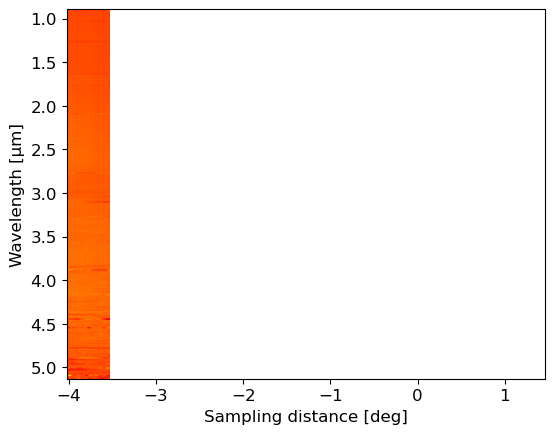

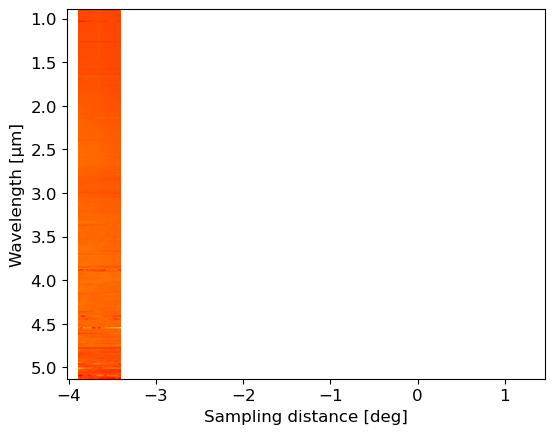

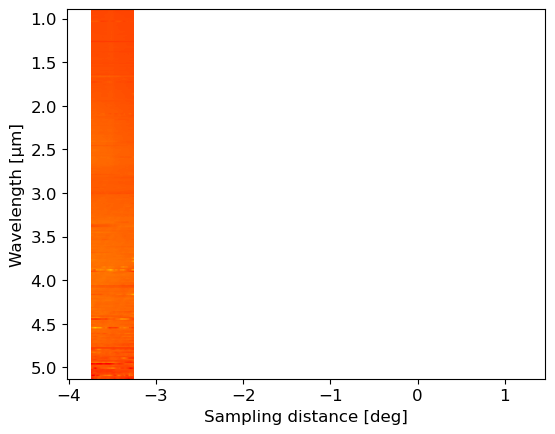

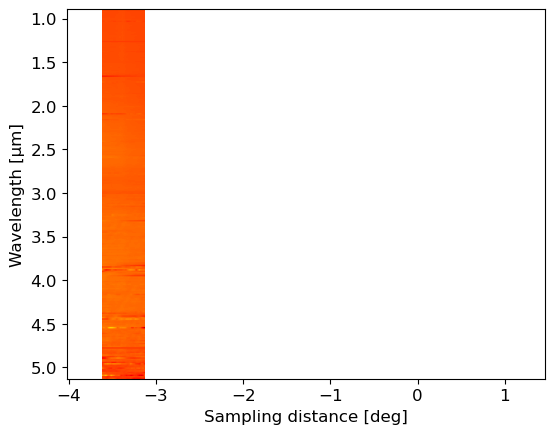

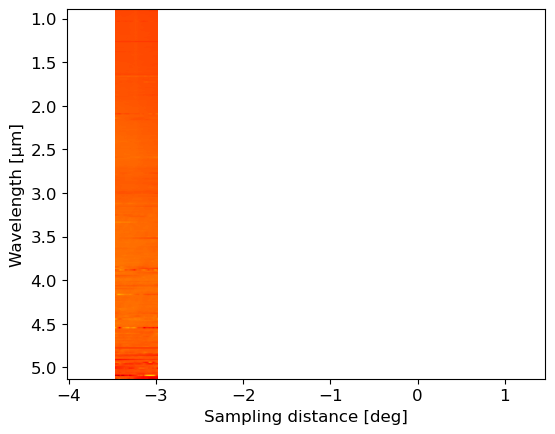

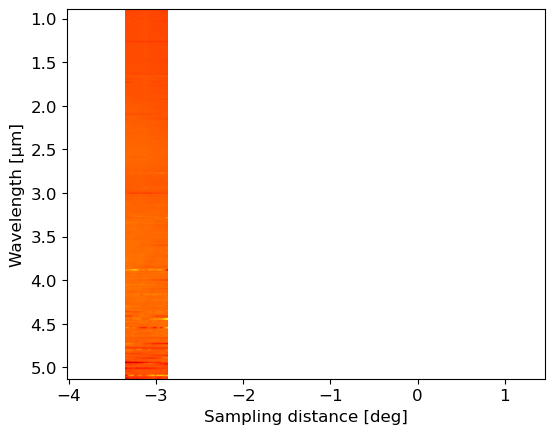

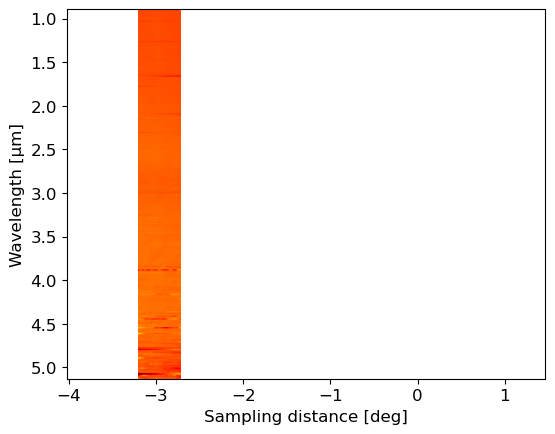

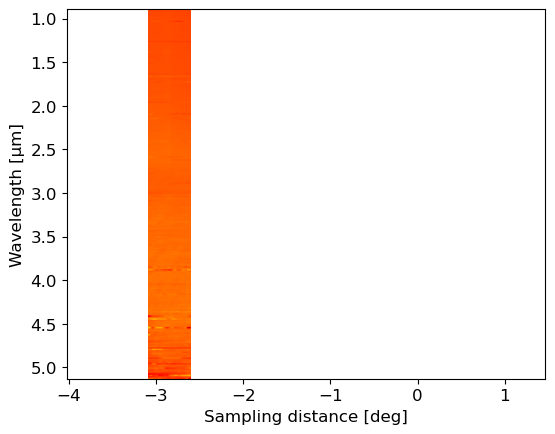

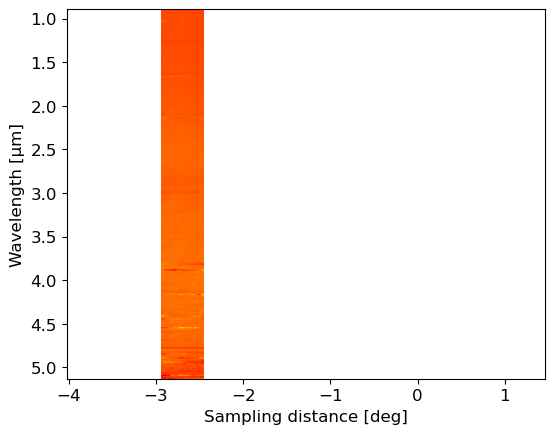

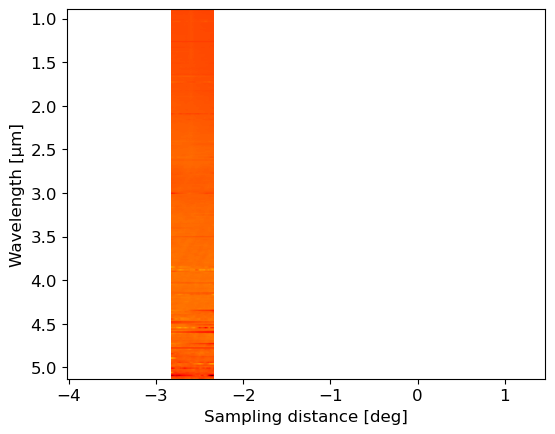

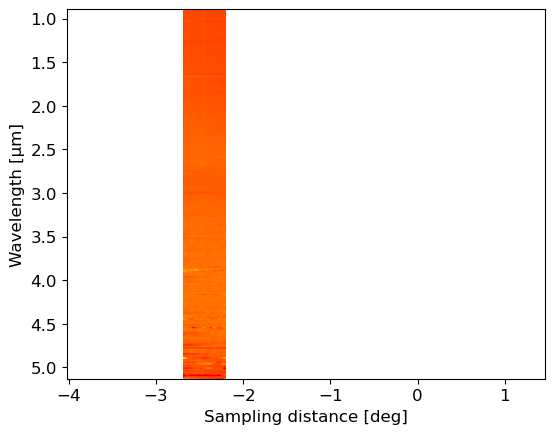

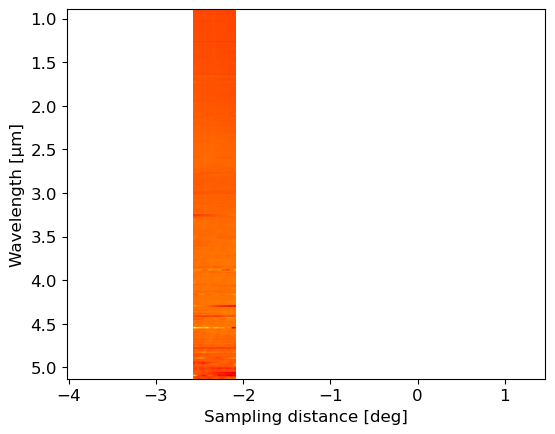

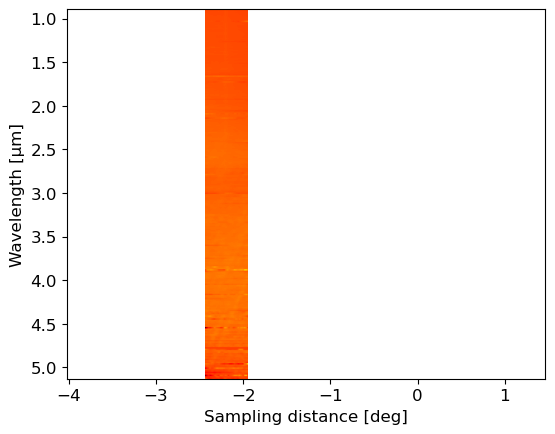

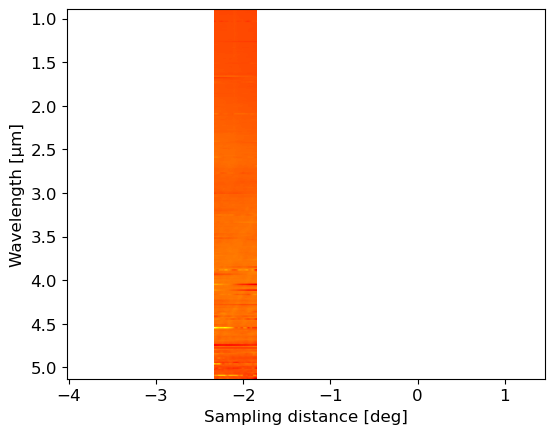

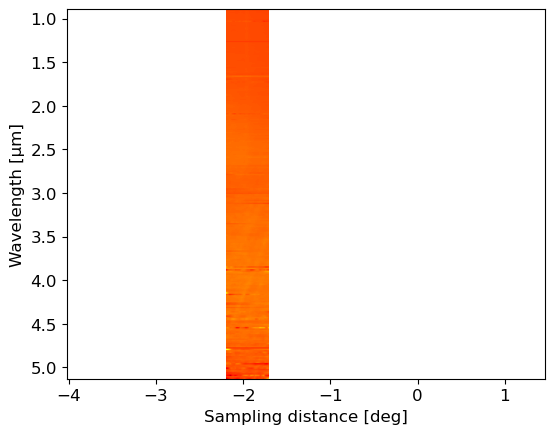

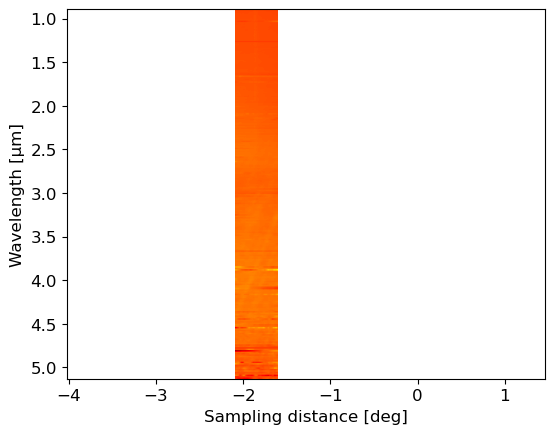

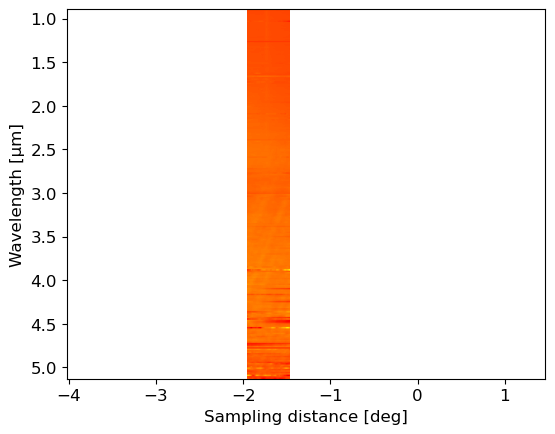

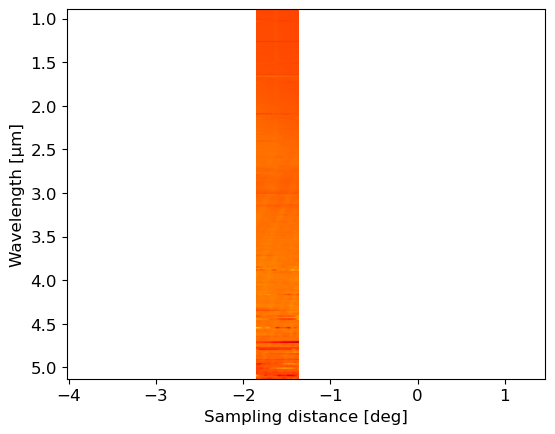

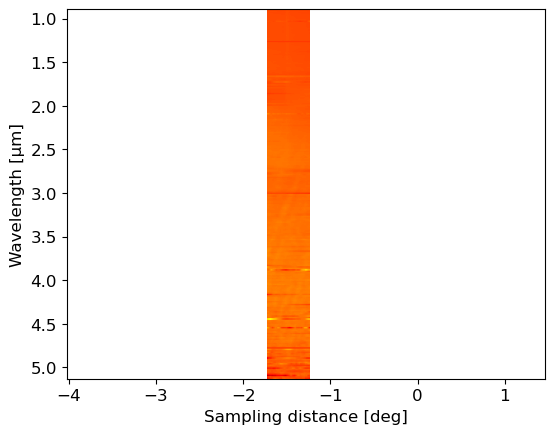

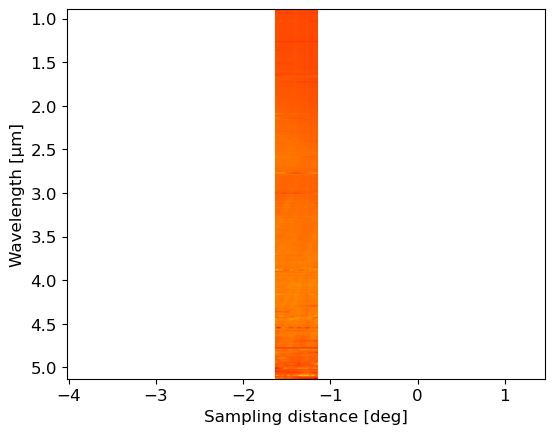

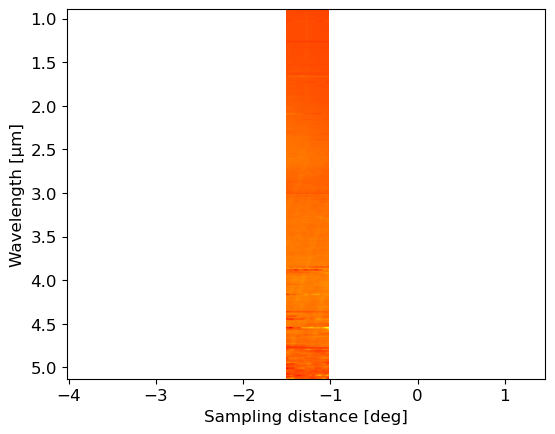

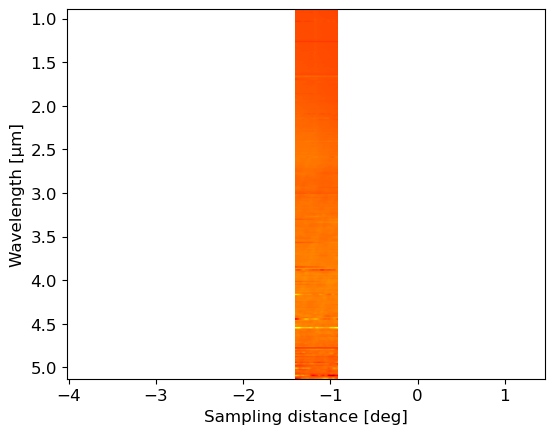

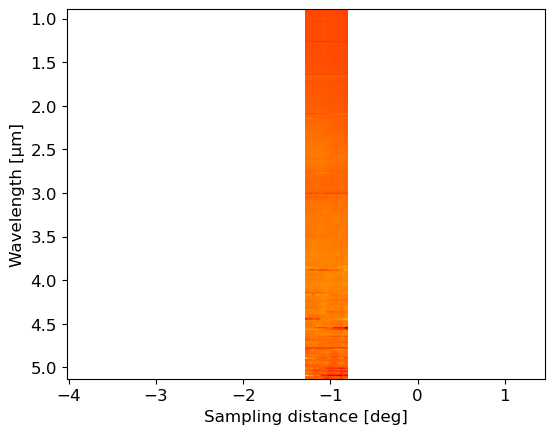

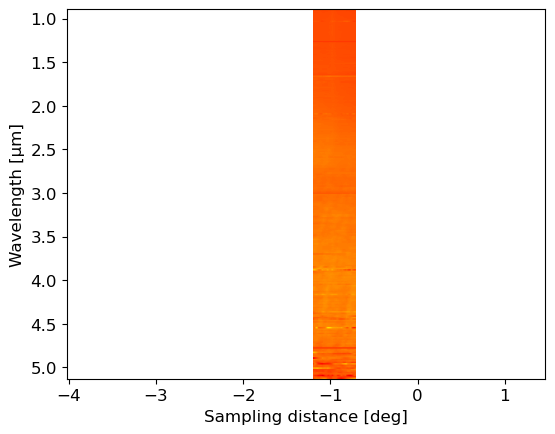

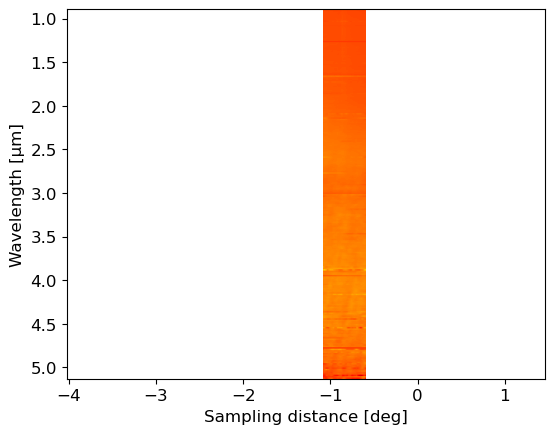

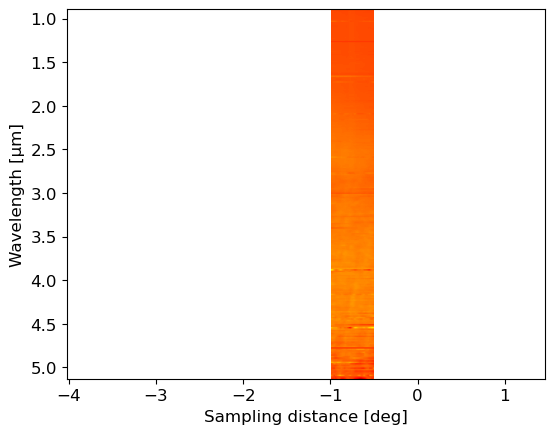

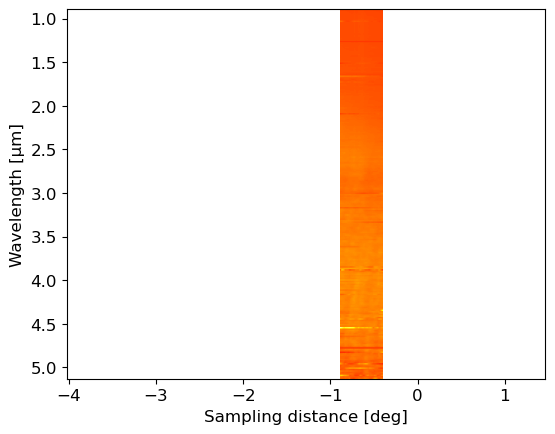

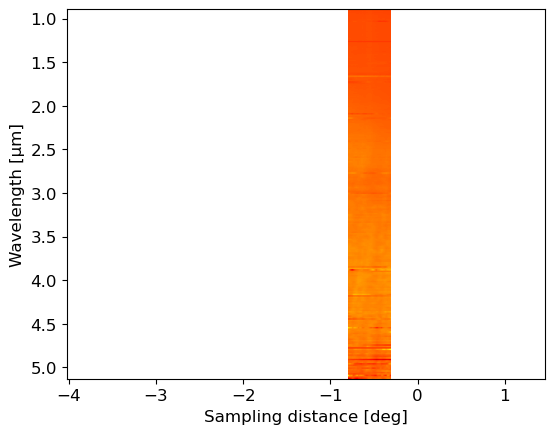

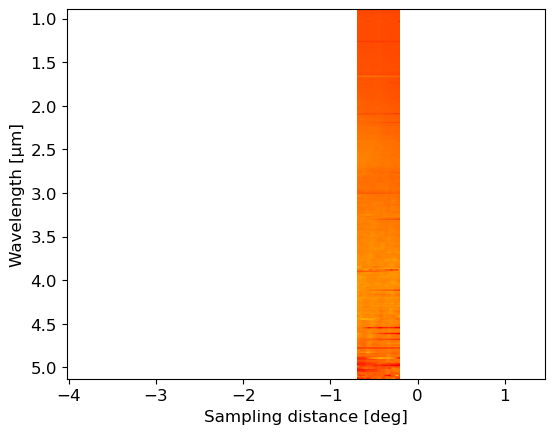

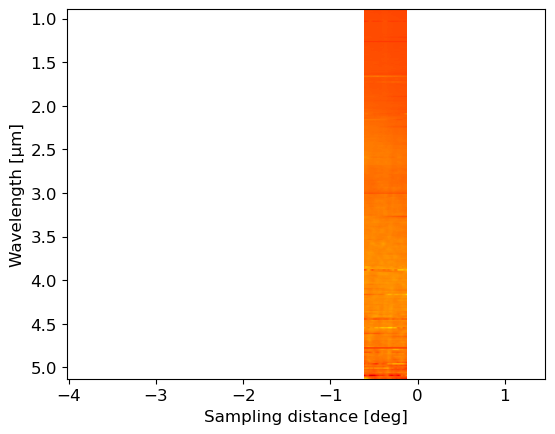

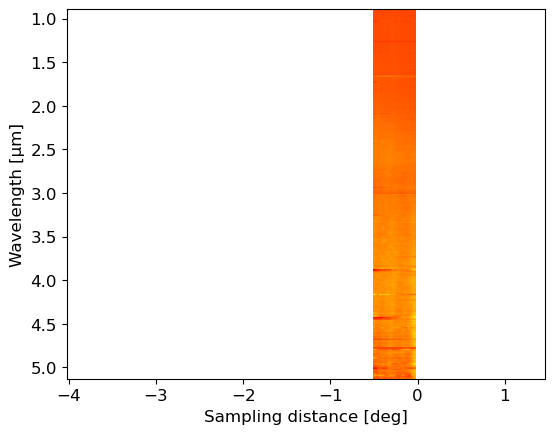

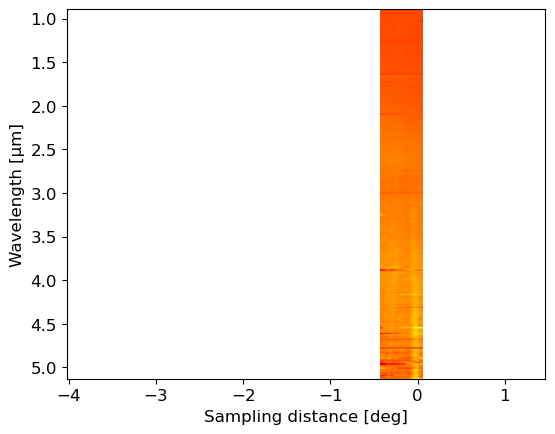

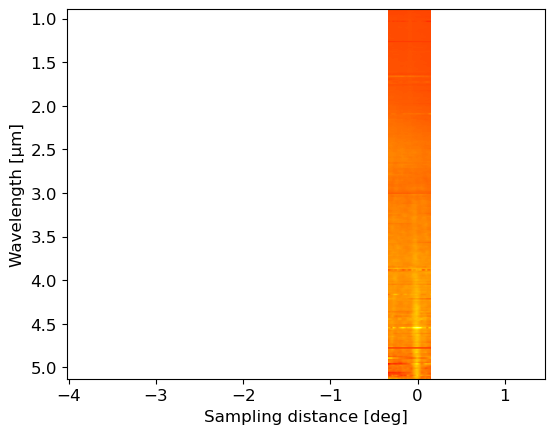

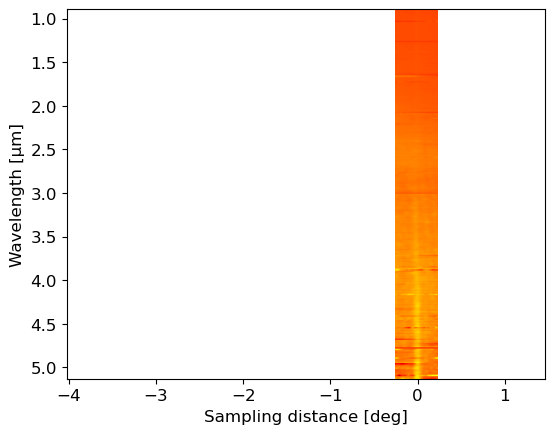

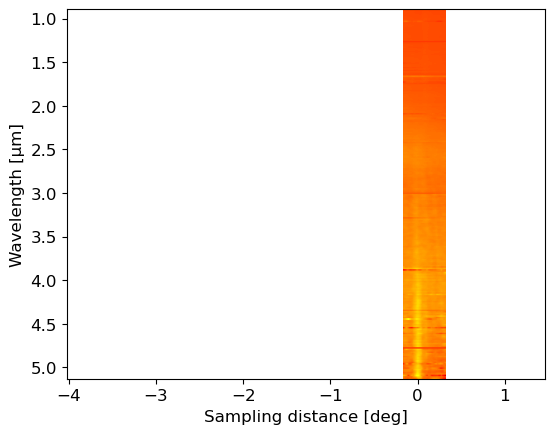

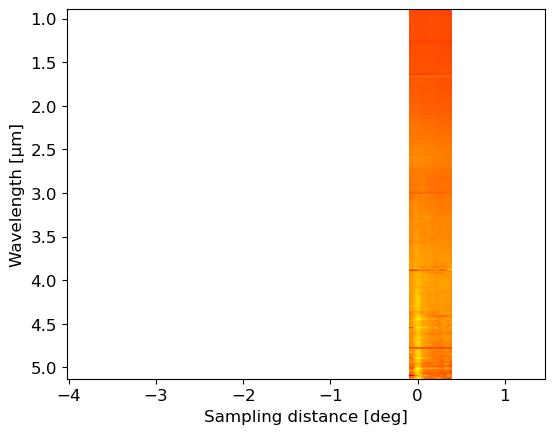

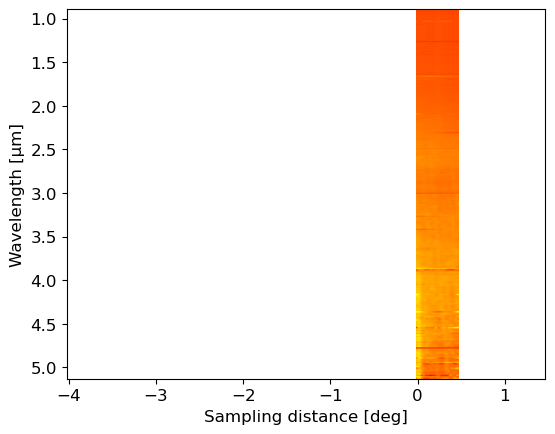

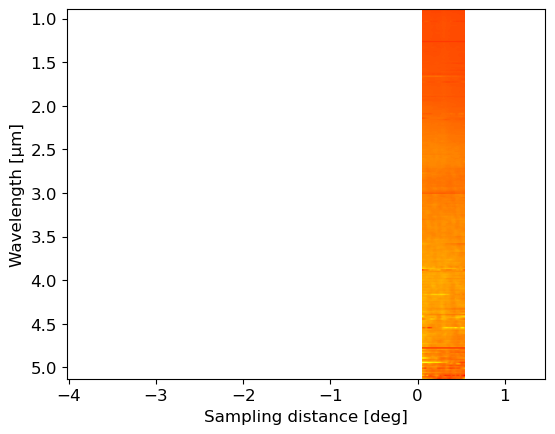

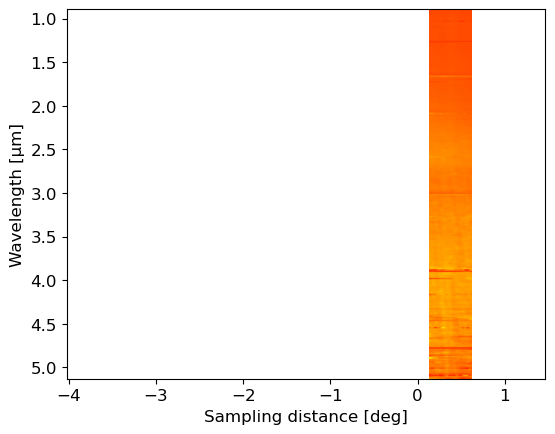

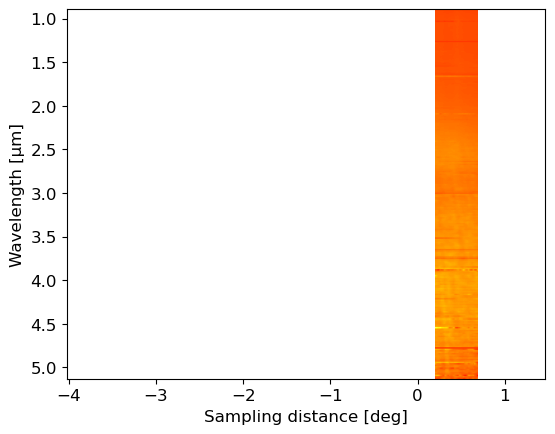

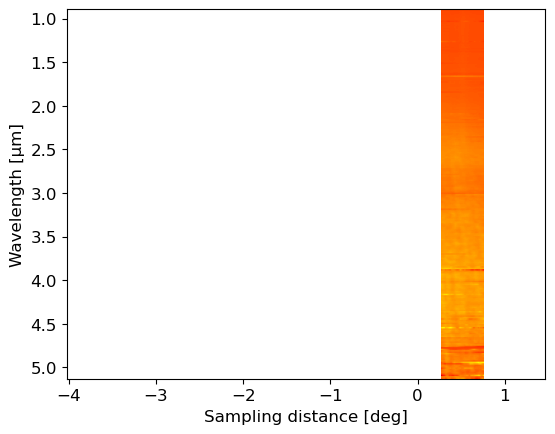

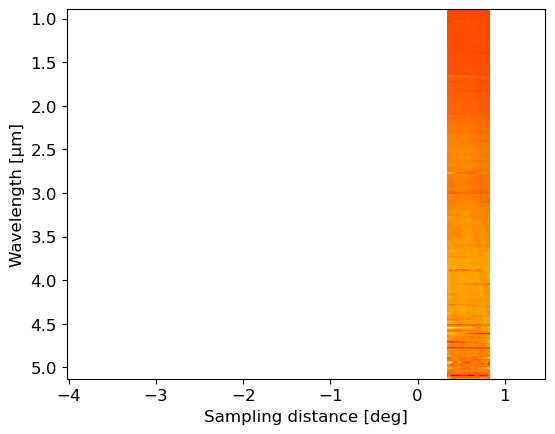

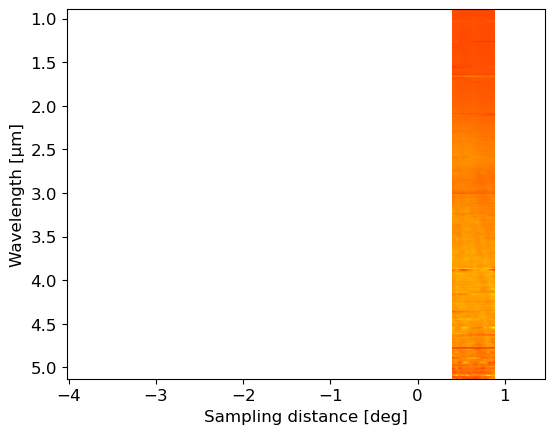

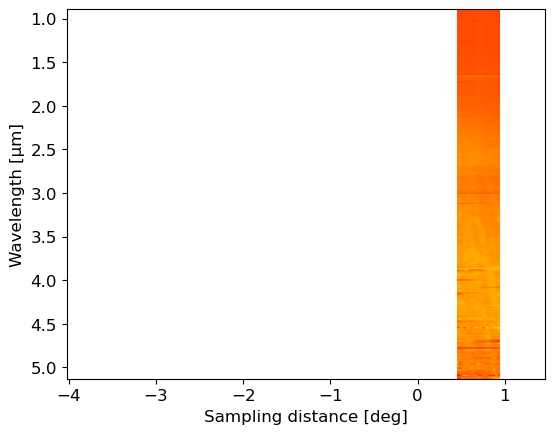

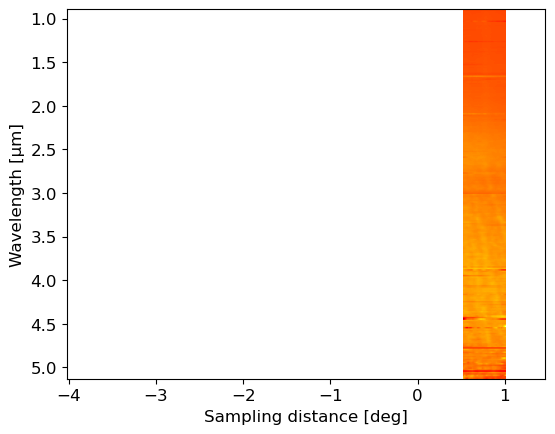

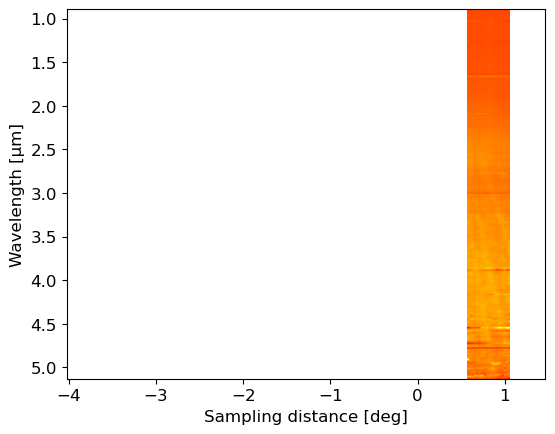

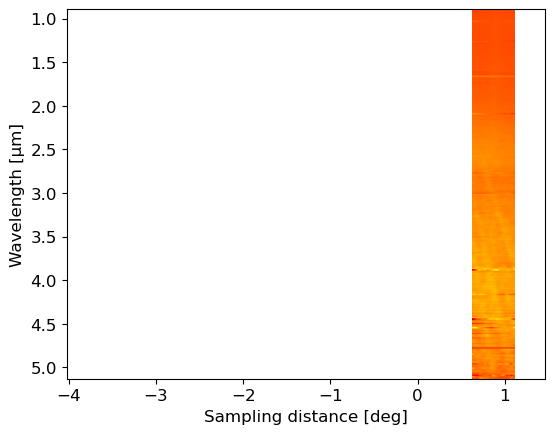

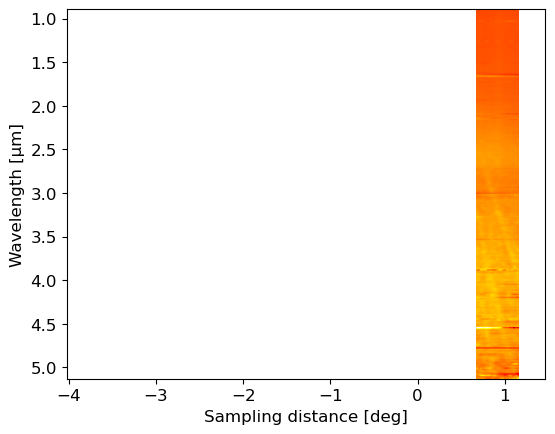

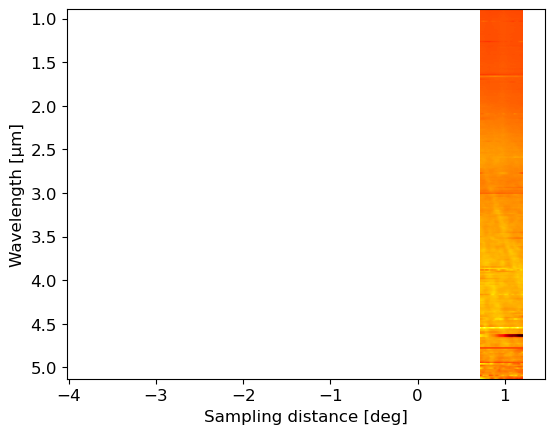

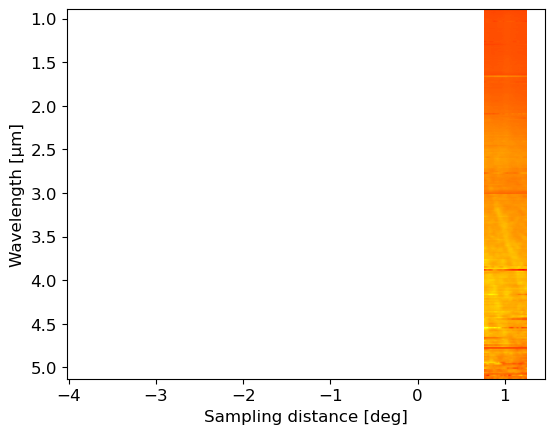

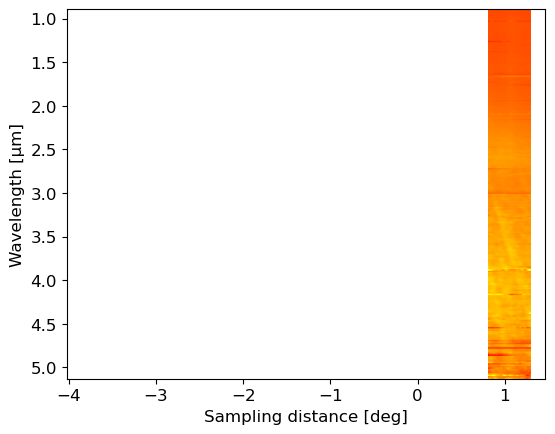

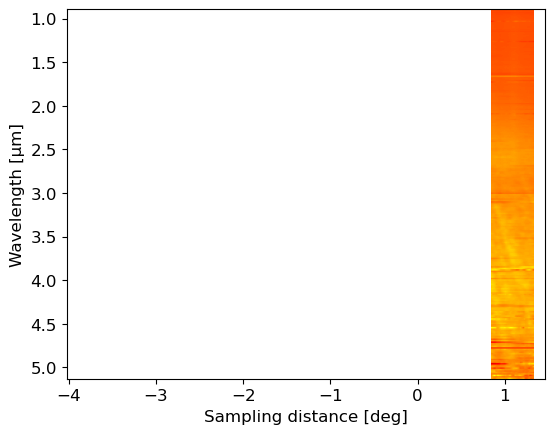

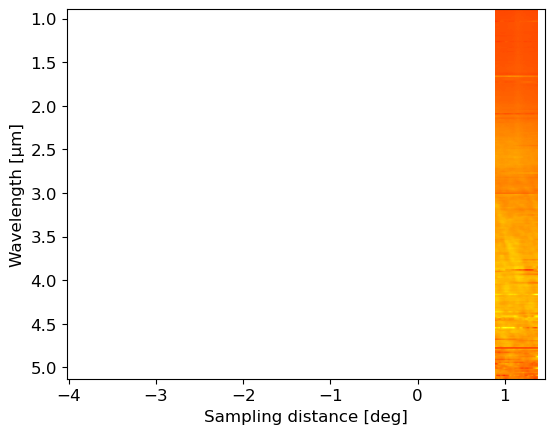

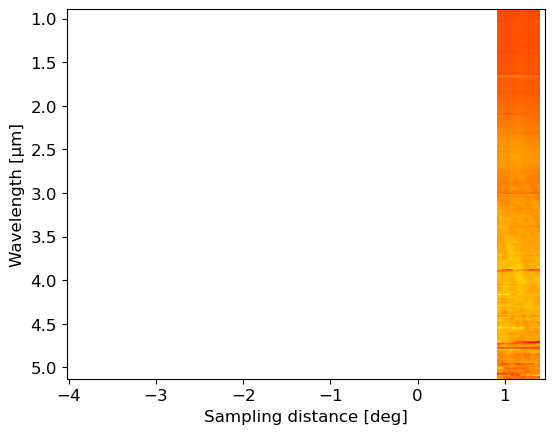

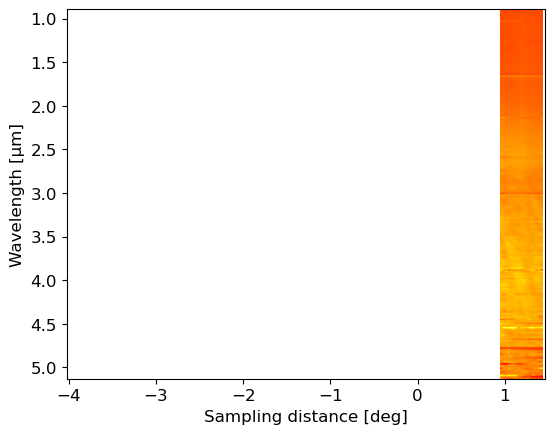

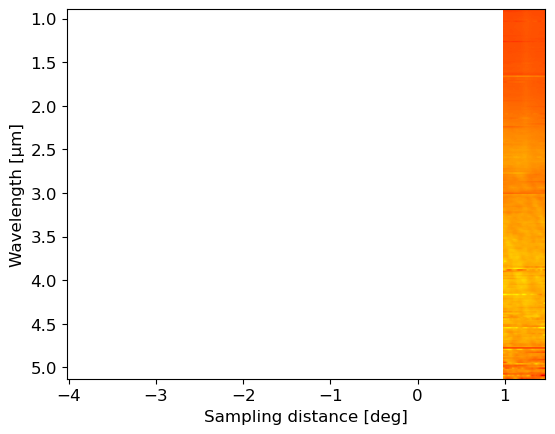

In [40]:
# Plot each image at its corresponding x position with specified width and height
for i, (img, width) in enumerate(zip(images, widths)):
    fig, ax = plt.subplots()
    extent = [x_offsets[i] - width / 2,  # Left boundary
              x_offsets[i] + width / 2,  # Right boundary
              h0,               # Bottom boundary
              h1]                # Top boundary
    # Normalize the image based on global min and max
    normalized_img = (img - global_min) / (global_max - global_min)
    ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot', vmin=0, vmax=0.9)

    ax.set_xlim(x_offsets[0] - widths[0] / 2, x_offsets[-1] + widths[-1] / 2)
    ax.set_xlabel("Sampling distance [deg]")
    ax.set_ylabel('Wavelength [μm]')
    # plt.savefig()
    plt.show()
    plt.close()

plt.show()